In [11]:
# Загружаем библиотеки
import tensorflow as tf # Нейросети
from tqdm.notebook import tqdm # Индикаторр выполнения действий
import numpy as np # Математика
from sklearn.model_selection import train_test_split # Разделение выборки на обучающую и тестовую
import matplotlib.pyplot as plt # Графики
from sklearn.metrics import accuracy_score # Метрика качества модели

# Библиотеки для нейросети
import keras
from keras import layers as L
from keras import backend as K

#### Загрузка данных

In [12]:
# Загружаем датасет с картинками
from keras.datasets import cifar10 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Разделение выборки на обучающую и тестовую
# Размер тестовой выборки 10000
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 10**4, random_state = 42)

In [13]:
# Наименование классов
class_names = np.array(['airplane','automobile ','bird ','cat ','deer ','dog ','frog ','horse ','ship ','truck'])

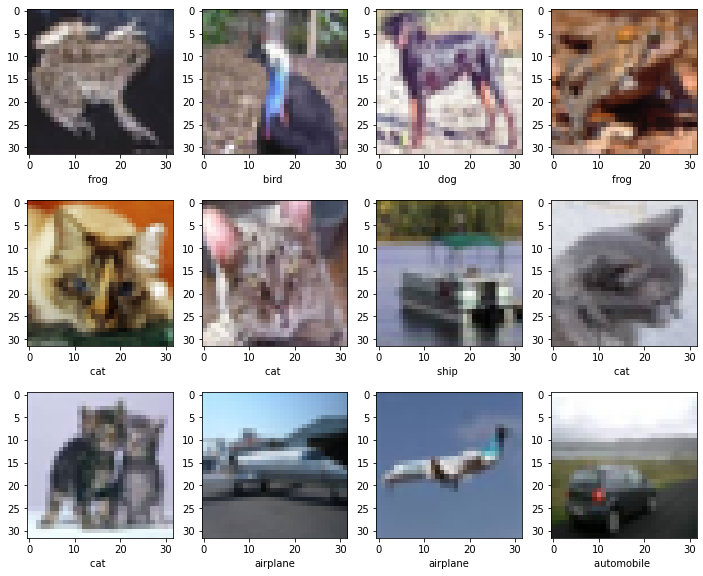

In [14]:
# Для проверки выведем несколько изображений
plt.figure(figsize = [12, 10])
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.xlabel(class_names[y_train[i, 0]])
    plt.imshow(X_train[i])

#### Нормирование кодировки пикселей изображений

In [15]:
# Каждый пиксель изображения закодирован тройкой чисел (RGB) от 0 до 255
# Приведём все данные в диапазон [0, 1]
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

#### Простая нейросеть

In [16]:
# Нейросеть последовательного типа
model = keras.Sequential()

# Преобразуем изображения в вектор
model.add(keras.layers.Flatten(
    input_shape = (32, 32, 3)) # На вход подаём картинки размером 32х32, цветность 3 канала (RGB)
                              ) 
# Первый полносвязный слой:
# - размерность подбираем достаточной для достижения точности 0,45
# - активация нелинейной функцией relu
model.add(keras.layers.Dense(256, activation = 'relu'))

# Выходной слой:
# - размерность выхода 10 (по количеству классов)
# - функция активации softmax для классификации на несколько классов
model.add(keras.layers.Dense(10, activation = 'softmax'))

#### Задание 1.1

In [17]:
# Собираем модель
model.compile(optimizer = 'adam', # Оптимизация с помощью метода стохастического градиентного спуска
              loss = 'categorical_crossentropy', # В ходе оптимизации минимизаруем многоклассовую кроссэнропию
              metrics = ['accuracy'] # Качество модели контролируем с помощью метрики accuracy, т.к. классы сбалансированы
             )

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               786688    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 789,258
Trainable params: 789,258
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Используем one-hot кодировку для классов
y_train_one_hot = tf.keras.utils.to_categorical(y_train)
y_val_one_hot = tf.keras.utils.to_categorical(y_val)
y_test_one_hot = tf.keras.utils.to_categorical(y_test)

In [26]:
# Обучаем модель
# (можно перезапускать этот фрагмент несколько раз)
model.fit(X_train, # Обучающая выборка
          y_train_one_hot,
          use_multiprocessing = False, # Многопоточное исполнение
          verbose = 1,
          validation_data = [X_val, y_val_one_hot], # Валидация на небольшой выборке
          epochs = 5 # Количество эпох обучения
          ) 

Epoch 1/5
1250/1250 [==============================] - 3s 3ms/step - loss: 1.4432 - accuracy: 0.4857 - val_loss: 1.5169 - val_accuracy: 0.4644
Epoch 2/5
1250/1250 [==============================] - 3s 2ms/step - loss: 1.4274 - accuracy: 0.4913 - val_loss: 1.5312 - val_accuracy: 0.4570
Epoch 3/5
1250/1250 [==============================] - 3s 2ms/step - loss: 1.4280 - accuracy: 0.4909 - val_loss: 1.5607 - val_accuracy: 0.4394
Epoch 4/5
1250/1250 [==============================] - 3s 2ms/step - loss: 1.4230 - accuracy: 0.4929 - val_loss: 1.5653 - val_accuracy: 0.4529
Epoch 5/5
1250/1250 [==============================] - 3s 2ms/step - loss: 1.4162 - accuracy: 0.4952 - val_loss: 1.5379 - val_accuracy: 0.4558


In [27]:
test_acc = accuracy_score(y_test, np.argmax(model.predict(X_test), axis=1))
print("\n Test_acc =", test_acc)
assert test_acc > 0.45, "Not good enough. Back to the drawing board :)"
print(" Not bad!")


 Test_acc = 0.4585
 Not bad!


#### Задание 1.2

In [48]:
# Нейросеть последовательного типа
model1 = keras.Sequential()
    
# Входной слой
model1.add(keras.Input(shape = (32, 32, 3))) # На вход подаём картинки размером 32х32, цветность 3 канала (RGB)

# Первый свёрточный слой
model1.add(keras.layers.Conv2D(filters = 10, # Количество выходных каналов
                               kernel_size = (3, 3), # Матрица свёртки 3х3
                               padding = 'same', # Применяем рамку для сохранения размера изображения после свёртки
                               activation='relu' # активация нелинейной функцией relu
                               ))

# Снижение размерности
model1.add(keras.layers.MaxPool2D(pool_size = (2, 2), # Уменьшение разммерности в 2 раза по  высоте и ширине
                                  padding = 'valid' # Изображение берём как есть, без рамок
                                  ))

# Преобразуем изображения в вектор
model1.add(keras.layers.Flatten())
          
# Первый полносвязный слой на 100 нейронов
model1.add(keras.layers.Dense(100, activation = 'relu'))

# Выходной слой с функцией softmax 
model1.add(keras.layers.Dense(10, activation = 'softmax'))


In [73]:
# Собираем модель
model1.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'] 
              )

In [76]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 10)        280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 10)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 2560)              0         
                                                                 
 dense_8 (Dense)             (None, 100)               256100    
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 257,390
Trainable params: 257,390
Non-trainable params: 0
________________________________________________

In [31]:
# Обучаем модель
model1.fit(X_train, # Обучающая выборка
           y_train_one_hot,
           use_multiprocessing = True, # Многопоточное исполнение
           verbose = 1,
           validation_data = [X_val, y_val_one_hot], # Валидация на небольшой выборке
           epochs = 5 # Количество эпох обучения
           ) 

Epoch 1/5
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5651 - accuracy: 0.4397 - val_loss: 1.3767 - val_accuracy: 0.5112
Epoch 2/5
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3050 - accuracy: 0.5386 - val_loss: 1.2590 - val_accuracy: 0.5563
Epoch 3/5
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1778 - accuracy: 0.5858 - val_loss: 1.1907 - val_accuracy: 0.5782
Epoch 4/5
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0926 - accuracy: 0.6164 - val_loss: 1.1399 - val_accuracy: 0.6055
Epoch 5/5
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0184 - accuracy: 0.6420 - val_loss: 1.1621 - val_accuracy: 0.5975


In [32]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, np.argmax(model1.predict(X_test), axis=1))
print("\n Test_acc =", test_acc)
assert test_acc > 0.50, "Not good enough. Back to the drawing board :)"
print(" Not bad!")


 Test_acc = 0.586
 Not bad!


#### Задание 1.3

In [91]:
# Список используемых оптимизаторов
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'Adamax', 'Ftrl', 'Nadam', 'RMSprop', 'SGD']
# Количество эпох
epochs = 25
# Результаты обучения - достигнутая точность на каждой эпохе
result = {}

# Перебираем оптимизаторы по списку
for current_optimizer in optimizers:
    # Объявляем слои модели
    model = keras.models.Sequential([
        keras.Input(shape = (32, 32, 3)),
        keras.layers.Conv2D(filters = 10, kernel_size = (3, 3), padding = 'same', activation='relu'),     
        keras.layers.MaxPool2D(pool_size = (2, 2), padding = 'valid'),
        keras.layers.Flatten(),
        keras.layers.Dense(100, activation = 'relu'),
        keras.layers.Dense(10, activation = 'softmax')
        ])
    # Собираем модель с текущим оптимизатором
    model.compile(optimizer = current_optimizer, 
                  loss = 'categorical_crossentropy', 
                  metrics = ['accuracy'] 
                  )
    # Обучаем модель
    model_history = model.fit(X_train,
                              y_train_one_hot,
                              use_multiprocessing = True,
                              verbose = 0,
                              validation_data = [X_val, y_val_one_hot],
                              epochs = epochs
                              ) 
    # Записываем результаты
    result[current_optimizer] = model_history.history['val_accuracy']

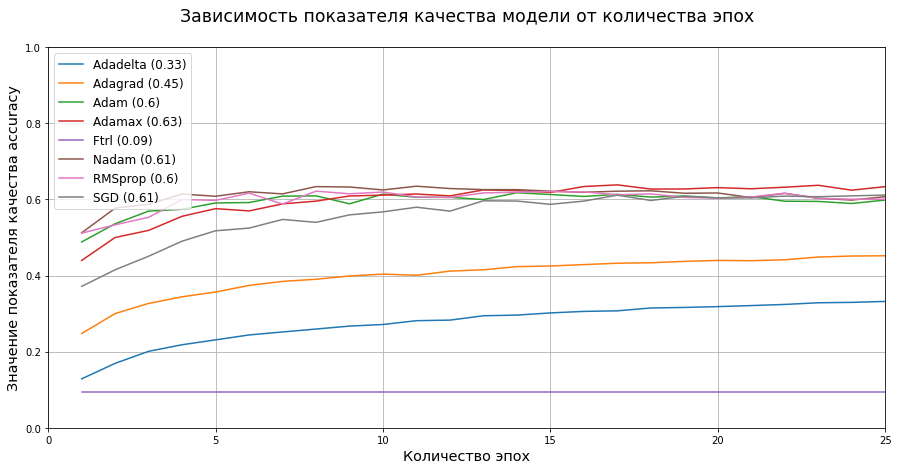

Наилучшие результаты демонстрируют оптимизаторы Adam, Adamax, Nadam, RMSprop, SGD, их показатель качества превышает 0.6
У метода Nadam быстрее всех возрастает показатель качества, а метод Adamax достиг наибольшего значения 0.63
Прочие методы, такие как Adadelta, Adagrad, Ftrl, показывают худшие результаты


In [119]:
# График зависимости точности модели от количества эпох
plt.figure(figsize = (15, 7))
for current_optimizer in optimizers:
    plt.plot(range(1, 26), result[current_optimizer], label = f'{current_optimizer} ({round(result[current_optimizer][-1], 2)})')
# Пределы по осям
plt.xlim(0, 25)
plt.ylim(0, 1)
plt.xlabel('Количество эпох', fontsize = 'x-large')
plt.ylabel('Значение показателя качества accuracy', fontsize = 'x-large')
plt.title('Зависимость показателя качества модели от количества эпох\n', fontsize = 'xx-large')
plt.legend(fontsize = 'large')
plt.grid()
plt.show()

print('Наилучшие результаты демонстрируют оптимизаторы Adam, Adamax, Nadam, RMSprop, SGD, их показатель качества превышает 0.6')
print('У метода Nadam быстрее всех возрастает показатель качества, а метод Adamax достиг наибольшего значения 0.63')
print('Прочие методы, такие как Adadelta, Adagrad, Ftrl, показывают худшие результаты')

#### Задание 1.4

In [125]:
# Модель с нормализацией в свёрточном слое
model = keras.Sequential()
model.add(keras.Input(shape = (32, 32, 3)))
model.add(keras.layers.Conv2D(filters = 10, kernel_size = (3, 3), padding = 'same',))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size = (2, 2), padding = 'valid'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

# Собираем модель
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'] 
              )

In [126]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 32, 32, 10)        280       
                                                                 
 batch_normalization_2 (Batc  (None, 32, 32, 10)       40        
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 32, 32, 10)        0         
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 16, 16, 10)       0         
 g2D)                                                            
                                                                 
 flatten_25 (Flatten)        (None, 2560)              0         
                                                                 
 dense_50 (Dense)            (None, 100)             

In [131]:
# Обучаем модель
model.fit(X_train,
          y_train_one_hot,
          use_multiprocessing = True,
          verbose = 1,
          validation_data = [X_val, y_val_one_hot],
          epochs = 5
          ) 

Epoch 1/5
1250/1250 [==============================] - 13s 10ms/step - loss: 0.6254 - accuracy: 0.7790 - val_loss: 1.3704 - val_accuracy: 0.5893
Epoch 2/5
1250/1250 [==============================] - 13s 10ms/step - loss: 0.6054 - accuracy: 0.7868 - val_loss: 1.5116 - val_accuracy: 0.5712
Epoch 3/5
1250/1250 [==============================] - 13s 10ms/step - loss: 0.5813 - accuracy: 0.7943 - val_loss: 1.4821 - val_accuracy: 0.5910
Epoch 4/5
1250/1250 [==============================] - 13s 11ms/step - loss: 0.5599 - accuracy: 0.8022 - val_loss: 1.7278 - val_accuracy: 0.5587
Epoch 5/5
1250/1250 [==============================] - 13s 11ms/step - loss: 0.5356 - accuracy: 0.8104 - val_loss: 1.6370 - val_accuracy: 0.5747


In [134]:
# Модель с нормализацией в полносвязном слое
model1 = keras.Sequential()
model1.add(keras.Input(shape = (32, 32, 3)))
model1.add(keras.layers.Conv2D(filters = 10, kernel_size = (3, 3), padding = 'same', activation='relu'))
model1.add(keras.layers.MaxPool2D(pool_size = (2, 2), padding = 'valid'))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(100))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.Activation('relu'))
model1.add(keras.layers.Dense(10, activation = 'softmax'))

# Собираем модель
model1.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'] 
              )

In [136]:
model1.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 10)        280       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 10)       0         
 g2D)                                                            
                                                                 
 flatten_26 (Flatten)        (None, 2560)              0         
                                                                 
 dense_52 (Dense)            (None, 100)               256100    
                                                                 
 batch_normalization_3 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 100)             

In [138]:
# Обучаем модель
model1.fit(X_train,
           y_train_one_hot,
           use_multiprocessing = True,
           verbose = 1,
           validation_data = [X_val, y_val_one_hot],
           epochs = 5
           ) 

Epoch 1/5
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6468 - accuracy: 0.7747 - val_loss: 1.3269 - val_accuracy: 0.5827
Epoch 2/5
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5758 - accuracy: 0.7998 - val_loss: 1.3907 - val_accuracy: 0.5795
Epoch 3/5
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5125 - accuracy: 0.8242 - val_loss: 1.3200 - val_accuracy: 0.6006
Epoch 4/5
1250/1250 [==============================] - 7s 6ms/step - loss: 0.4597 - accuracy: 0.8419 - val_loss: 1.4239 - val_accuracy: 0.5948
Epoch 5/5
1250/1250 [==============================] - 7s 6ms/step - loss: 0.4098 - accuracy: 0.8601 - val_loss: 1.5384 - val_accuracy: 0.5872


In [141]:
print(f'Нормализация в свёрточном слое позволила достить показателя точности accuracy = {round(accuracy_score(y_test, np.argmax(model.predict(X_test), axis=1)), 2)}')
print(f'Нормализация в полносвязном слое даёт accuracy = {round(accuracy_score(y_test, np.argmax(model1.predict(X_test), axis=1)), 2)}')
print('Показатели точности практически не изменились')

Нормализация в свёрточном слое позволила достить показателя точности accuracy = 0.58
Нормализация в полносвязном слое даёт accuracy = 0.57
Показатели точности практически не изменились


#### Задание 1.5

In [340]:
# Штатный колбек EarlyStopping не умеет останавливаться при достижении определённого уровня точности, пишем свой
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('val_accuracy') >= 0.55: # Пороговое значение показателя точности на валидационной выборе
            self.model.stop_training = True # Когда порог достигнут останавливаем обучение

callback = CustomCallback()

In [345]:
# Словарь для хранения результата
result = {}

# Перебираем значения размера подвыборки batch_size
for batch_size in [2 ** x for x in range(0, 13)]: # Степени двойки от 0 до 12
    # Модель для исседования влияния batch_size
    model = keras.models.Sequential([
                        keras.Input(shape = (32, 32, 3)),
                        keras.layers.Conv2D(filters = 10, kernel_size = (3, 3), padding = 'same', activation='relu'),     
                        keras.layers.MaxPool2D(pool_size = (2, 2), padding = 'valid'),
                        keras.layers.Flatten(),
                        keras.layers.Dense(100, activation = 'relu'),
                        keras.layers.Dense(10, activation = 'softmax')
                        ])
    # Собираем модель
    model.compile(optimizer = 'adam', 
                  loss = 'categorical_crossentropy', 
                  metrics = ['accuracy'] 
                  )
    # Обучаем модель
    history = model.fit(X_train,
                        y_train_one_hot,
                        use_multiprocessing = True,
                        verbose = 0,
                        validation_data = [X_val, y_val_one_hot],
                        callbacks = [callback],
                        epochs = 25,
                        batch_size = batch_size
                        ) 
    # Записываем результат
    result[batch_size] = len(history.history['loss'])

In [352]:
print('Размер подвыборки - количество эпох до достижения показателя точности 55%')
for batch_size in result.keys():
    print(f'{batch_size} - {result[batch_size]}') 
print('Вывод: с увеличением размера подвыборки необходимо большее количество эпох для достижения целевого значения точности')   
print('Но batch_size = 1 тоже плохо!') 

Размер подвыборки - количество эпох до достижения показателя точности 55%
1 - 5
2 - 2
4 - 2
8 - 2
16 - 2
32 - 2
64 - 4
128 - 4
256 - 5
512 - 7
1024 - 12
2048 - 17
4096 - 25
Вывод: с увеличением размера подвыборки необходимо большее количество эпох для достижения целевого значения точности
Но batch_size = 1 тоже плохо!


#### Задание 1.6

#### Задание 1.7

In [531]:
dropout = 0.5

# Большая нейросеть!
model = keras.Sequential() 
model.add(keras.Input(shape = (32, 32, 3))) # Входной слой
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu')) # Первый свёрточный слой
model.add(keras.layers.MaxPool2D(pool_size = (2, 2), padding = 'valid')) # Снижение размерности
model.add(keras.layers.BatchNormalization()) # Нормализация
model.add(keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu')) # Второй свёрточный слой
model.add(keras.layers.MaxPool2D(pool_size = (2, 2), padding = 'valid')) # Снижение размерности
model.add(keras.layers.BatchNormalization()) # Нормализация
model.add(keras.layers.Flatten()) # Преобразование в вектор
model.add(keras.layers.Dropout(dropout)) # Отбрасывание части признаков
model.add(keras.layers.Dense(256, activation = None)) # Первый полносвязный слой
model.add(keras.layers.Dropout(dropout)) # Отбрасывание части признаков
model.add(keras.layers.BatchNormalization()) # Нормализация
model.add(keras.layers.Activation('relu')) # Активация
model.add(keras.layers.Dense(64, activation = None)) # Второй полносвязный слой
model.add(keras.layers.Dropout(dropout)) # Отбрасывание части признаков
model.add(keras.layers.BatchNormalization()) # Нормализация
model.add(keras.layers.Activation('relu')) # Активация
model.add(keras.layers.Dense(10, activation = 'softmax')) # Выходной слой

In [532]:
# Собираем модель
model.compile(optimizer = 'Adamax', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'] 
              )
model.summary()

Model: "sequential_178"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_214 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_214 (MaxPooli  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                                 
 batch_normalization_124 (Ba  (None, 16, 16, 32)       128       
 tchNormalization)                                               
                                                                 
 conv2d_215 (Conv2D)         (None, 16, 16, 128)       36992     
                                                                 
 max_pooling2d_215 (MaxPooli  (None, 8, 8, 128)        0         
 ng2D)                                                           
                                                    

In [ ]:
history = model.fit(X_train,
                    y_train_one_hot,
                    use_multiprocessing = True,
                    verbose = 1,
                    validation_data = [X_val, y_val_one_hot],
                    epochs = 5,
                    batch_size = 64
                    ) 

Epoch 1/5
625/625 [==============================] - 43s 69ms/step - loss: 0.6866 - accuracy: 0.7688 - val_loss: 0.8457 - val_accuracy: 0.7341
Epoch 2/5
625/625 [==============================] - 43s 68ms/step - loss: 0.6724 - accuracy: 0.7731 - val_loss: 1.0663 - val_accuracy: 0.7051
Epoch 3/5
625/625 [==============================] - 44s 71ms/step - loss: 0.6523 - accuracy: 0.7783 - val_loss: 0.8433 - val_accuracy: 0.7431
Epoch 4/5
625/625 [==============================] - 44s 71ms/step - loss: 0.6395 - accuracy: 0.7843 - val_loss: 0.8179 - val_accuracy: 0.7533
Epoch 5/5
255/625 [===========>..................] - ETA: 24s - loss: 0.6163 - accuracy: 0.7907

In [511]:
test_acc = accuracy_score(y_test, np.argmax(model.predict(X_test), axis=1))
print("\n Test_acc =", test_acc)
if test_acc > 0.8:
    print("Это победа!")


 Test_acc = 0.7063
